# Lab 2: More about numbers in Python

Welcome to Lab 02! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn how to:

- work with various types of numbers in Python.

- get more practice with Taylor Polynomials.

- start to explore some other sources of error.

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Friday, February 16, 2024 at 10:00 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** 

List collaborators here.

## 1. Small Numbers

### How Python Treats Numbers

Python has three built-in numeric data types: integers, floating-point numbers, and complex numbers. Today we will only be concerned with integers and floating-point numbers. Integers and floating points are separated by the presence or absence of a decimal point. For instance, 5 is an integer whereas 5.0 is a floating-point number. Run the cells below to see examples.

In [1]:
5

5

In [2]:
5.0

5.0

We can use the `type` function to know which type of a value or a variable belongs. 

In [3]:
print(type(5))
print(type(5.0))

<class 'int'>
<class 'float'>


In [4]:
x1 = 5
x2 = 5.0

print(type(x1))
print(type(x2))

<class 'int'>
<class 'float'>


A central theme of this course is the concept of approximations. Python's built-in floating-point class performs some calculations that we might not agree with. We all know that the sum of `1.1` and `2.2` is `3.3`, but Python seems to disagree. 

Run the cell below to see.

In [5]:
(1.1+2.2)  == 3.3

False

Why does Python think this is **False**? Run the cell below to see what Python thinks. 

In [6]:
1.2+2.2

3.4000000000000004

To quote the [documentation](https://docs.python.org/3.3/tutorial/floatingpoint.html):

> Unfortunately, most decimal fractions cannot be represented exactly as binary fractions. A consequence is that, in general, the decimal floating-point numbers you enter are only approximated by the binary floating-point numbers actually stored in the machine.

Sometimes we will get what we expect. Run the cells below to see some examples.

In [7]:
1.1+1.1

2.2

In [8]:
1.1+2.3

3.4

In [9]:
1.1+2.2

3.3000000000000003

Finally, below are a couple more fun ones...

In [10]:
0.1+0.1+0.1-0.3

5.551115123125783e-17

In [11]:
99.999999999-99.999999997

1.9999930600533844e-09

Hopefully what you just saw isn't that big a surprise, given what we've been doing in class lately with binary representations of non-integers. But it's still valuable to see the ramifications of what we've learned "in action"!

Another big takeaway from this demo is that there is virtually **never** a good reason to check two floating-point numbers for equality!

# 2. IEEE 754

IEEE is the *Institute of Electrical and Electronics Engineers*. Among other things they publish various standards, and standard \#754 concerns floating-point numbers. Nearly all modern computers today use the IEEE 754 standard for floating-point numbers. The overall scheme is the same as the 6-bit example we worked with in class, except the IEEE 754 standard obviously calls for many more bits to work with. Some of the highlights of IEEE 754 include:
- 2 levels of precision: single and double (this should sound familiar if you've done any programming in C)
- in both levels of precision, 1 bit is allocated for the sign
- single-precision allocates 8 bits for the exponent, 23 bits for the fractional part of the mantissa, and uses a bias of 127 when storing the signed exponent.
- double-precision allocates 11 bits for the exponent, 52 bits for the fractional part of the mantissa, and uses a bias of 1023 when storing the signed exponent.

Remember the scheme we used in class stores numbers in the form $(-1)^s \times 1.f \times 2^e$, where $s$ is the sign bit, $f$ is the fractional part of the mantissa, and $e$ is the exponent. (Remember there is no need to waste space to store the $1$ to the left of the point.)

Also recall from our discussion in class that in this scheme there is no way to represent the number 0. Thus the actual IEEE 754 standard *reserves* some bit patterns to represent "special" values such as zero. Specifically when the **exponent** bits are all 1's or all 0's, that bit pattern represents some sort of "special" value, and thus isn't interpreted using our $(-1)^s \times 1.f \times 2^e$ scheme. Said another way, the exponent bit pattern $0...001$ is the smallest available exponent and the bit pattern $1...110$ is the largest.

**Question 1**

What are the smallest (i.e. closest to negative infinity, or most-left on a number line) and largest (i.e. most-right on a number line) exponents we actually have available in IEEE 754 double-precision format? Write your answers in the next cell.

(put your answer to Q1 here)
1 - 1023 = 1022 <-- lower
2046 - 1023 = 1023 <-- upper

**Question 2**

What is the smallest (i.e. closest to 0) positive number available in IEEE 754 double-precision? What is the largest (i.e. closest to +inf) number? Feel free to write code to compute these values (based on our floating-point representation scheme) or compute these values "by hand" and record your work. (If the latter, please simply enter your answer as commented-code, since the cell is a code block.)

In [22]:
## the lowest value would be 2^-1022
## the largest value would be:
print("small value = " + "2^-1022")

e = 1023
f = 1
for x in range (1,52):
    f = f + 2**(-1*x)
largeValue = f*(2**e)

print("large value: ")
print(largeValue)

small value = 2^-1022
large value: 
1.7976931348623155e+308


**Question 4**

Machine-epsilon is defined as the smallest positive number that when added to 1 results in a value greater than 1. Write a short program that finds this value.


(put your answer to Q3 here)

(2^-1021) - (2^-1022)= 2.2250738585e-308

**Question 4**

Machine-epsilon is defined as the smallest positive number that when added to 1 results in a value greater than 1. Write a short program that finds this value.


In [25]:
## write your code/ solution to Q4 here

sum = 0 
for x in range(1022):
    if sum + 1 > 1:
        print(sum)
        break
    sum = 2**(-1022 + x)

2.220446049250313e-16


## 3. More Taylor Polynomials

**Question 5**

Recall that $tan(\pi/4)=1$, so one possible way to approximate $\pi$ is to approximate $4 atan(1)$. In your notes find a degree-11 Taylor Polynomial for $f(x)=atan(x)$. Then write a Python program to compute the value of this polynomial at $x=1$, thus approximating $atan(1)$. The result should be close to $\pi/4$. (Hint: you might want to look back at Lab 1 and use/ adapt some of the code you wrote when you evaluated a Taylor Polynomial in that lab.)

In [33]:
## write your code for Q5 here
import numpy as np
import math 

def arctan(x, n):
    result = 0
    for i in range(n+1):
        coef = (-1)**i
        num = x**(2*i+1)
        denom = 2*i+1
        result += coef * (num / denom)
    return result

def taylorPol(x):
    return arctan(x, 11)
    
## value at 1
x_value = 1
taylor_approximation = taylorPol(x_value)

pi4 = (math.pi)/4

print(pi4 - taylor_approximation)

0.020797471915614985


Hopefully you're not very impressed with how much error there is, especially after going all the way to degree-11. It can be shown that if the Taylor Polynomial for $atan(x)$ has degree $2n-1$, then the error term is $$\frac{(-1)^{n}}{1+c^2} \frac{x^{2n+1}}{2n+1}$$
for some $c$ between 0 and $x$.


**Question 6**

Use this error term to determine how many terms we need to approximate $atan(x)$ with error no more than $10^{-7}$. Then re-run your code above with that many terms (instead of stopping at degree-11), and verify that your approximation indeed meets this error bound. Paste your "new" code for this question in the cell below.

In [3]:
## write your code for Q6 here
import numpy as np
import math 

def arctan(x, n):
    result = 0
    for i in range(n+1):
        coef = (-1)**i
        num = x**(2*i+1)
        denom = 2*i+1
        result += coef * (num / denom)
    return result

def taylorPol(x, error_bound):
    n = 0
    current_error = abs(arctan(x, n) - (math.pi/4))
    while current_error > error_bound:
        n += 1
        current_error = abs(arctan(x, n) - (math.pi/4))
    return n

def arctan_approximation(x, n):
    result = 0
    for i in range(n+1):
        coef = (-1)**i
        num = x**(2*i+1)
        denom = 2*i+1
        result += coef * (num / denom)
    return result


error_bound = 0.00001  

terms_needed = taylorPol(1, error_bound)

taylor_approximation = arctan_approximation(1, terms_needed)

pi4 = (math.pi) / 4

print(terms_needed)
print(abs(pi4 - taylor_approximation))

2499
9.999999599985543e-05


## 4. Sources of error

Finally, we're going to spend some time the next few days in class looking at some common sources of error (and how to *hopefully* reduce that error!)

**Question 7**

As sort of a teaser, plot the function $f(x)=\frac{1-cos(x^2)}{x^4}$ over the interval $[-1,1]$. Then change your plot so we're graphing over the interval $[-0.001,0,001]$. Do you notice anything weird/ interesting/ suspicious?...

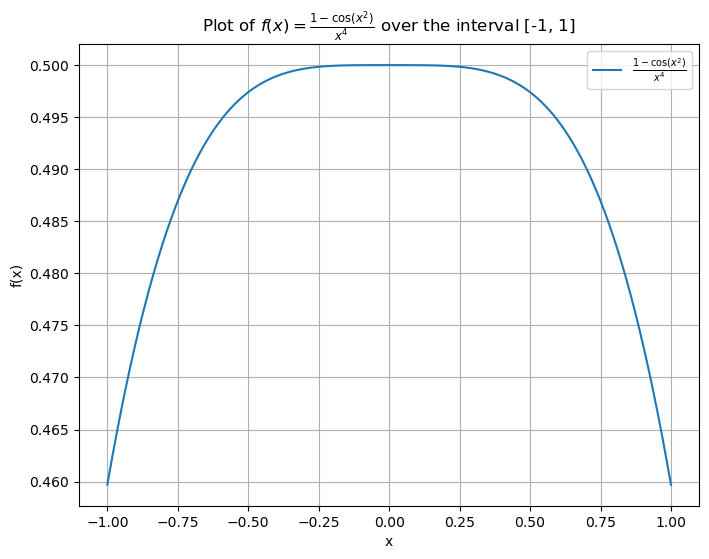

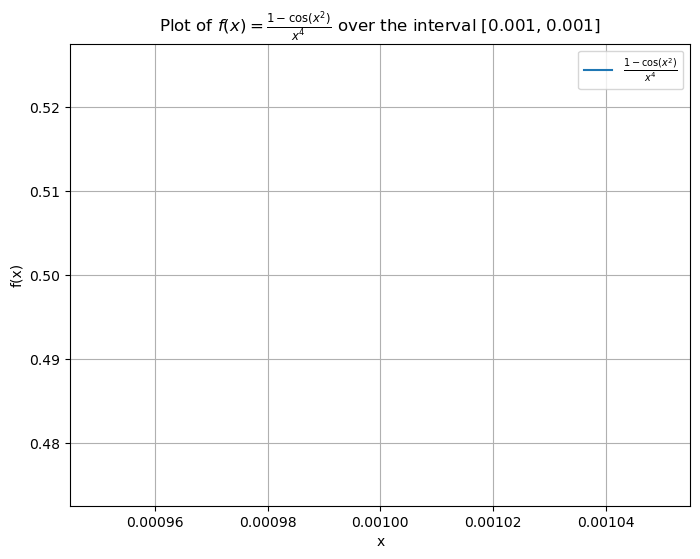

In [4]:
## write your code for Q7 here; if you have any remarks/ observations, inclue them as comments after the code
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1 - np.cos(x**2)) / x**4

x_interval1 = np.linspace(-1, 1, 1000)

plt.figure(figsize=(8, 6))
plt.plot(x_interval1, f(x_interval1), label=r'$\frac{1-\cos(x^2)}{x^4}$')
plt.title('Plot of $f(x) = \\frac{1-\\cos(x^2)}{x^4}$ over the interval [-1, 1]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

x_interval2 = np.linspace(0.001, 0.001, 1000)

plt.figure(figsize=(8, 6))
plt.plot(x_interval2, f(x_interval2), label=r'$\frac{1-\cos(x^2)}{x^4}$')
plt.title('Plot of $f(x) = \\frac{1-\\cos(x^2)}{x^4}$ over the interval [0.001, 0.001]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#its interesting that nothing shows up for the second one. 

## 5. Submitting your work
You're done with Lab 02! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab02` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 02 assignment to Gradescope for Grading.